In [35]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_rows = 120
import matplotlib as mpl
import sys
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [2]:
dataset_material = pd.read_excel('Data_Ghiringhelli.xlsx', 'Material Data')
dataset_atomic = pd.read_excel('Data_Ghiringhelli.xlsx',   'Atomic Data')

### Calculated energy difference between RS and ZB of 82 structures

In [3]:
def spliting_zb_and_rs(dataset):
    dataset_zb1 = dataset[dataset['Classification']=='ZB1']
    dataset_zb2 = dataset[dataset['Classification']=='ZB2']
    dataset_zb3 = dataset[dataset['Classification']=='ZB3']
    dataset_zb  = pd.concat([dataset_zb1,dataset_zb2,dataset_zb3])
    
    dataset_rs1 = dataset[dataset['Classification']=='RS1']
    dataset_rs2 = dataset[dataset['Classification']=='RS2']
    dataset_rs3 = dataset[dataset['Classification']=='RS3']
    dataset_rs  = pd.concat([dataset_rs1,dataset_rs2,dataset_rs3])
    
    dataset_N = dataset[dataset['Classification']=='N']
    return dataset_zb, dataset_rs, dataset_N

In [4]:
import matplotlib.pyplot as plt
from matplotlib  import cm
import numpy as np
#---------------------------------

cmap_blue = mpl.cm.Blues(np.linspace(0,1,20))
cmap_blue = mpl.colors.ListedColormap(cmap_blue[10:,:-1])

cmap_red = mpl.cm.Reds(np.linspace(0,1,20))
cmap_red = mpl.colors.ListedColormap(cmap_red[10:,:-1])

In [5]:
dataset_zb, dataset_rs, dataset_n = spliting_zb_and_rs(dataset=dataset_material)
#---------------------------------
x,y,z            = dataset_material['ZA'].values, dataset_material['ZB'].values, dataset_material['DE']
x_zb, y_zb, z_zb = dataset_zb['ZA'].values, dataset_zb['ZB'].values, dataset_zb['DE'].values
x_rs, y_rs, z_rs = dataset_rs['ZA'].values, dataset_rs['ZB'].values, dataset_rs['DE'].values
x_n, y_n, z_n    = dataset_n['ZA'].values, dataset_n['ZB'].values, dataset_n['DE'].values

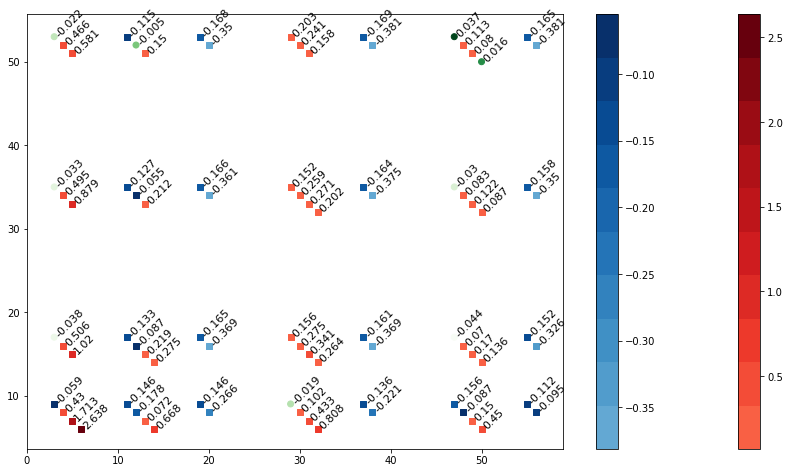

In [6]:

fig, ax = plt.subplots(figsize=(15,8))
im = ax.scatter(x_zb, y_zb, c=z_zb,  cmap=cmap_red, marker = 's')
fig.colorbar(im, ax=ax)
im = ax.scatter(x_rs, y_rs, c=z_rs,  cmap=cmap_blue, marker = 's')
fig.colorbar(im, ax=ax)
im = ax.scatter(x_n, y_n, c=z_n, marker = 'o', cmap=mpl.cm.Greens)
#---------------------------------

for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]), size=11, rotation=45)
    
plt.show()

### Prediction using 1D 2D and 3D descriptor

In [7]:
def get_row(element,dataframe):
    return (dataframe.loc[dataframe['A']==element])

def collecting_1D_descriptor(a,b, dataframe):
    raw_a = get_row(element=a, dataframe=dataframe)
    raw_b = get_row(element=b, dataframe=dataframe)
    
    X_loc = np.abs(raw_a['rs'].values-raw_b['rp'].values) * np.exp(-raw_a['rs'].values)
    Y_loc = np.abs(raw_b['IP'].values-raw_b['EA'].values) / (raw_a['rp'].values)**2
    
    return X_loc[0], Y_loc[0]

def collecting_2D_descriptor(a,b, dataframe):
    raw_a = get_row(element=a, dataframe=dataframe)
    raw_b = get_row(element=b, dataframe=dataframe)
    
    X_loc = np.abs(raw_a['rs'].values-raw_b['rp'].values) * np.exp(-raw_a['rs'].values)
    Y_loc = (np.abs(raw_b['IP'].values-raw_b['EA'].values) / (raw_a['rp'].values)**2)  \
    + (raw_a['rs'].values - raw_b['rp'].values) / np.exp(raw_a['rs'].values)
    
    return X_loc[0], Y_loc[0]

def collecting_3D_descriptor(a,b, dataframe):
    raw_a = get_row(element=a, dataframe=dataframe)
    raw_b = get_row(element=b, dataframe=dataframe)
    
    X_loc = np.abs(raw_a['rs'].values-raw_b['rp'].values) * np.exp(-raw_a['rs'].values) 
    Y_loc = np.abs(raw_b['IP'].values-raw_b['EA'].values) / (raw_a['rp'].values)**2 \
            + (raw_a['rs'].values - raw_b['rp'].values)/np.exp(raw_a['rs'].values) \
            + (raw_b['rp'].values - raw_b['rs'].values)/np.exp(raw_a['rd'].values)
    
    return X_loc[0], Y_loc[0]

In [8]:
def get_row(element,dataframe):
    return (dataframe.loc[dataframe['A']==element])

def collecting_descriptor(a,b, dataframe, dime=1):
    raw_a = get_row(element=a, dataframe=dataframe)
    raw_b = get_row(element=b, dataframe=dataframe)
    
    if dime==1:
        X_loc = np.abs(raw_a['rs'].values-raw_b['rp'].values) * np.exp(-raw_a['rs'].values)
        Y_loc = np.abs(raw_b['IP'].values-raw_b['EA'].values) / (raw_a['rp'].values)**2
        
    elif dime==2:
        X_loc = np.abs(raw_a['rs'].values-raw_b['rp'].values) * np.exp(-raw_a['rs'].values)
        Y_loc = (np.abs(raw_b['IP'].values-raw_b['EA'].values) / (raw_a['rp'].values)**2)  \
        + (raw_a['rs'].values - raw_b['rp'].values) / np.exp(raw_a['rs'].values)
        
    elif dime==3:
        X_loc = np.abs(raw_a['rs'].values-raw_b['rp'].values) * np.exp(-raw_a['rs'].values) 
        Y_loc = np.abs(raw_b['IP'].values-raw_b['EA'].values) / (raw_a['rp'].values)**2 \
                + (raw_a['rs'].values - raw_b['rp'].values)/np.exp(raw_a['rs'].values) \
                + (raw_b['rp'].values - raw_b['rs'].values)/np.exp(raw_a['rd'].values)
    else:
        print('invalid dimension')
        raise
            
    return X_loc[0], Y_loc[0]

In [9]:
def devide_into_parts(dataframe_2D):
    Zb_l = (dataframe_2D[(dataframe_2D['Z']>0.05)&(dataframe_2D['Z']<0.5)])
    Zb_l['Classification'] = 'Zb_l'
    Zb_h = (dataframe_2D[(dataframe_2D['Z']>0.5)])
    Zb_h['Classification'] = 'Zb_h'
    Rs = (dataframe_2D[dataframe_2D['Z']<-0.05])
    Rs['Classification'] = 'Rs'
    Ns = (dataframe_2D[(dataframe_2D['Z']>-0.05) & (dataframe_2D['Z']<0.05)])
    Ns['Classification'] = 'Ns'
    all_frames = [Zb_l,Zb_h,Rs,Ns]
    return all_frames

In [10]:
def preparation_prediction(dataset_material=dataset_material, dataset_atomic=dataset_atomic, dime=2):
    datadict = dict()
    datadict['X'] = []
    datadict['Y'] = []
    datadict['Z'] = []
    datadict['A'] = []
    datadict['B'] = []

    for index, row in dataset_material.iterrows():

            x_loc, y_loc = collecting_descriptor(a=row['A'], b=row['B'], dataframe=dataset_atomic, dime=dime)
            datadict['Z'].append(row['DE'])
            datadict['X'].append(x_loc)
            datadict['Y'].append(y_loc)
            datadict['A'].append(row['A'])
            datadict['B'].append(row['B'])
            
    return datadict
        
 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

def prediction_dict(all_frames):
    
    prediction_array = dict()
    prediction_array['X_train'], prediction_array['y_train'], prediction_array['Z'] = [],[],[]
    prediction_array['prediction'], prediction_array['classification'] = [],[]
    
    for classification in all_frames:
        X = classification.iloc[:,:1].values
        y = classification.iloc[:,1].values
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.0001, random_state=0)
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)
        prediction_array['X_train'].append(X_train.flatten())
        prediction_array['y_train'].append(y_train.flatten())
        prediction_array['prediction'].append(regressor.predict(X_train))
        prediction_array['classification'].append(classification['Classification'])
        prediction_array['Z'].append(np.delete(classification['Z'].values, 
                                               classification[classification['Y']==y_test[0]]['Z']))
        print('coeff',regressor.coef_)
        print('intercept',regressor.intercept_)
        print('RMSE',mean_squared_error(y_train,regressor.predict(X_train)))
        print(y_test)
        print('------------------------')
        
    return prediction_array

### Linear Regression

In [12]:
# please change here the dataset name if there is any change in name #
    
def action(dimension):
    datadict = preparation_prediction(dataset_material=dataset_material, dataset_atomic=dataset_atomic, dime=dimension)
    data = pd.DataFrame.from_dict(datadict)
    print(type(data))
    all_frames = devide_into_parts(data);
    data_pred = prediction_dict(all_frames)
    data_pred = pd.DataFrame.from_dict(data_pred)
    return data_pred

In [21]:
data2D = action(dimension=2)

<class 'pandas.core.frame.DataFrame'>
coeff [16.44363768]
intercept 2.9215881097018577
RMSE 1.015333168912222
[4.88882306]
------------------------
coeff [-96.84008851]
intercept 21.045492862918866
RMSE 24.554225259631952
[9.51337735]
------------------------
coeff [17.63929624]
intercept -0.9620923526903022
RMSE 0.3964115152620415
[1.42339549]
------------------------
coeff [15.75006926]
intercept 0.7883274357385215
RMSE 0.40708649179620554
[2.24977117]
------------------------


C:\Users\UdaykumarGajera\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\UdaykumarGajera\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\UdaykumarGajera\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [42]:
def plotting_with_prediction_line(data_pd):
    for ii in range(len(data_pd)):
        plt.plot(data_pd['y_train'][ii],data_pd['X_train'][ii],'*')
        plt.plot(data_pd['prediction'][ii], data_pd['X_train'][ii],'-')
        plt.xlim(0,8)

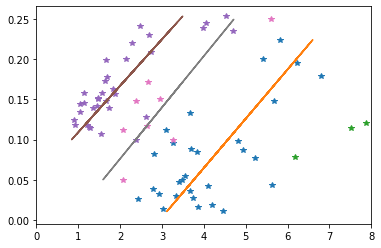

In [43]:
plotting_with_prediction_line(data3D)